# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Завантаження даних
df_bike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/yulu_rental.csv')

In [ ]:
# Перетворення datetime у правильний формат
df_bike['datetime'] = pd.to_datetime(df_bike['datetime'])
df_bike.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df_bike['date'] = df_bike.index.date
df_bike['day'] = df_bike.index.day
df_bike['week'] = df_bike.index.isocalendar().week
df_bike['weekday_num'] = df_bike.index.weekday
df_bike['weekday'] = df_bike.index.day_name()
df_bike['year'] = df_bike.index.year
df_bike['month'] = df_bike.index.month
df_bike['hour'] = df_bike.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [ ]:
df_bike.shape

(10886, 19)

In [ ]:
df_bike.head ()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


Даних в наборі 10 886 рядків і після додання колонок для аналізу 19. В одному рядку дані містяться за годину

Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [ ]:
count_bike = df_bike['count'].resample('D').sum()

In [ ]:
count_bike

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


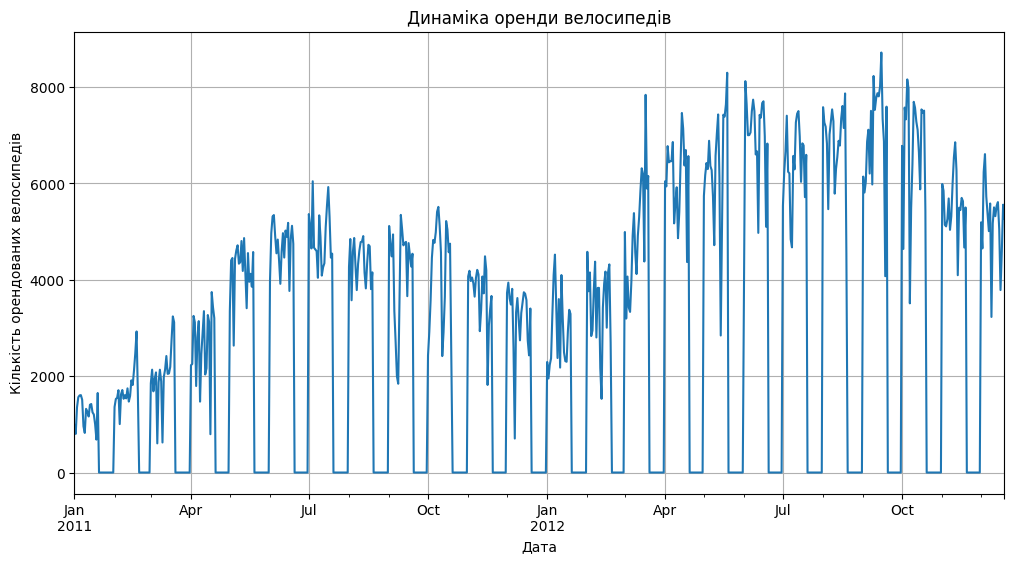

In [ ]:
count_bike.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='Дата',
    ylabel='Кількість орендованих велосипедів',
    grid=True
);

Дивлячись на цей графік, бачимо дивну картину...на перший погляд здається, що в деякі часи наші велосипеди не брали і тому на графіку нулі

перевіремо цю гіпотезу

In [ ]:
df_bike.hour.value_counts().sort_index ()

,count
hour,
0,455
1,454
2,448
3,433
4,442
5,452
6,455
7,455
8,455


гіпотеза не підтвердилась, так як бачимо, що в кожну годину доби, велосипеди брали...

спробуємо перевірити теж саме, але по дням місяця

In [ ]:
#спеціально вивожу кількість днів за місяць
df_bike.day.value_counts().sort_index().head(31)

,count
day,
1,575
2,573
3,573
4,574
5,575
6,572
7,574
8,574
9,575


спеціально ставимо на вивід 31 рядок (максимальна кількість днів у місяці), але бачимо, що во всих даних інформація лише за 19 днів. Тепер зрозуміло "дивність" графіка

Тепер побудуємо графік з урахуванням "нових знань"

In [ ]:
count_bike_new = count_bike[count_bike.index.day <= 19]

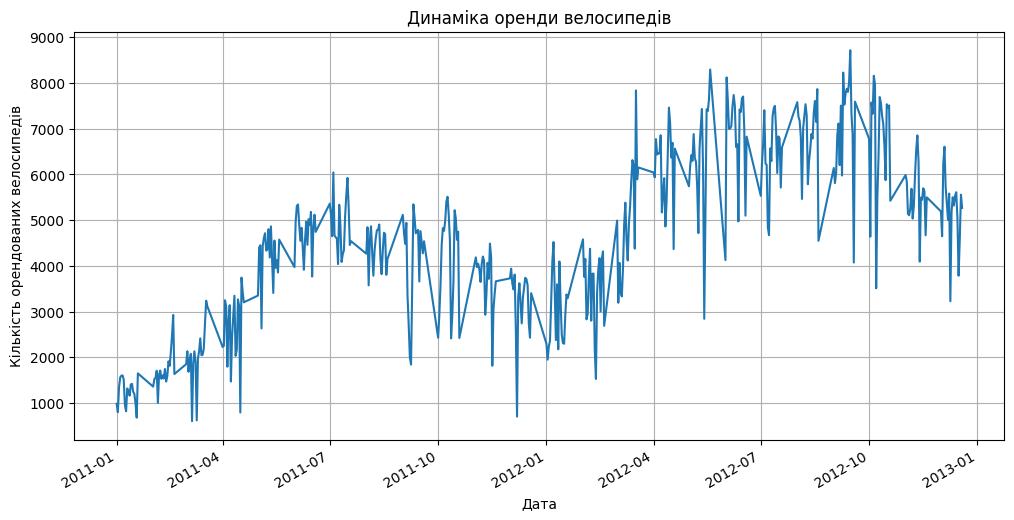

In [ ]:
count_bike_new.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='Дата',
    ylabel='Кількість орендованих велосипедів',
    grid=True
);

бачимо, що графік став схожий на графік, без дивних відхилень

трохи згладемо графік за допомогою rolling () з вікном 7, тобто виведемо середнє по цьому дню і 6 попереднім

In [ ]:
mean_for_7days = count_bike_new.rolling(window=7).mean()

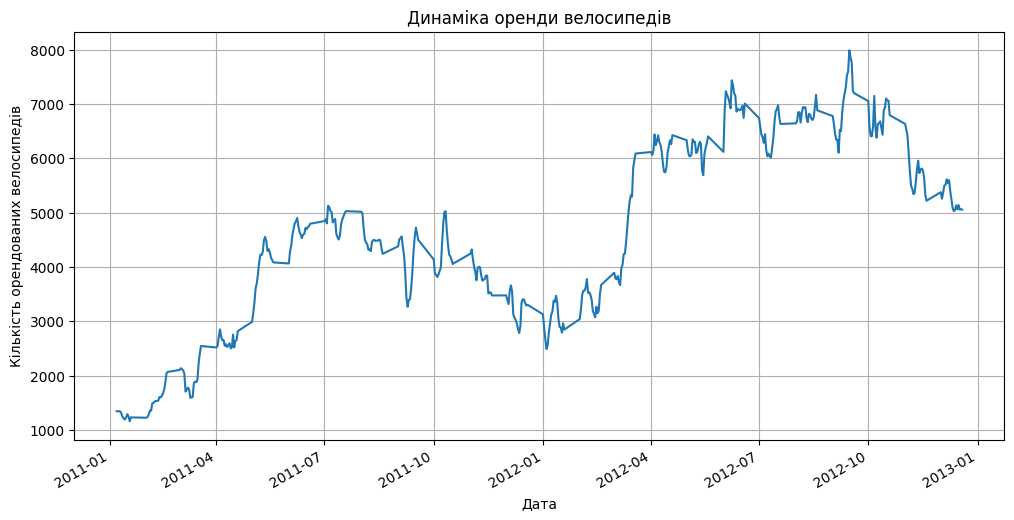

In [ ]:
mean_for_7days.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='Дата',
    ylabel='Кількість орендованих велосипедів',
    grid=True
);

##відповіді

1. графік має заломи, так як ми рахуємо кількість за кожну годину, доволі "ретельний графік"

як варіант можно порахувати rolling avarage (не знайшла, як правильно на укр). Графік вище з даним методом

як ще варіант кількість рахувати за тиждень або місяць

2. в 2011 попит на велосипеди був нижчий, ніж в 2012. Можна зробити припущення, що про компанію ще не знали і тому нею не користувались або розголуженість сеті була не зручна для користувачів, в 2012 ситуація стала краще. Також чітко видна сезоність...весною попит починає зростати, стабільно високий влітку і в восени знижується.

3. сезоні коливання помітні, весною, влітку та на початку осені попит більший більш тепла погода, то і попит більший

4. є викиди з аномально високим попитом, то можуть бути свята або наприклад перекриття доріг))) скоріше дістатися точки велосипедом
також аномально низький попит, зима (дуже холодно), або дощ чи штормовий вітер


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [ ]:
mean_bike_season = df_bike.groupby('season')['count'].mean()

In [ ]:
mean_bike_season.round (2)

,count
season,
1,116.34
2,215.25
3,234.42
4,198.99


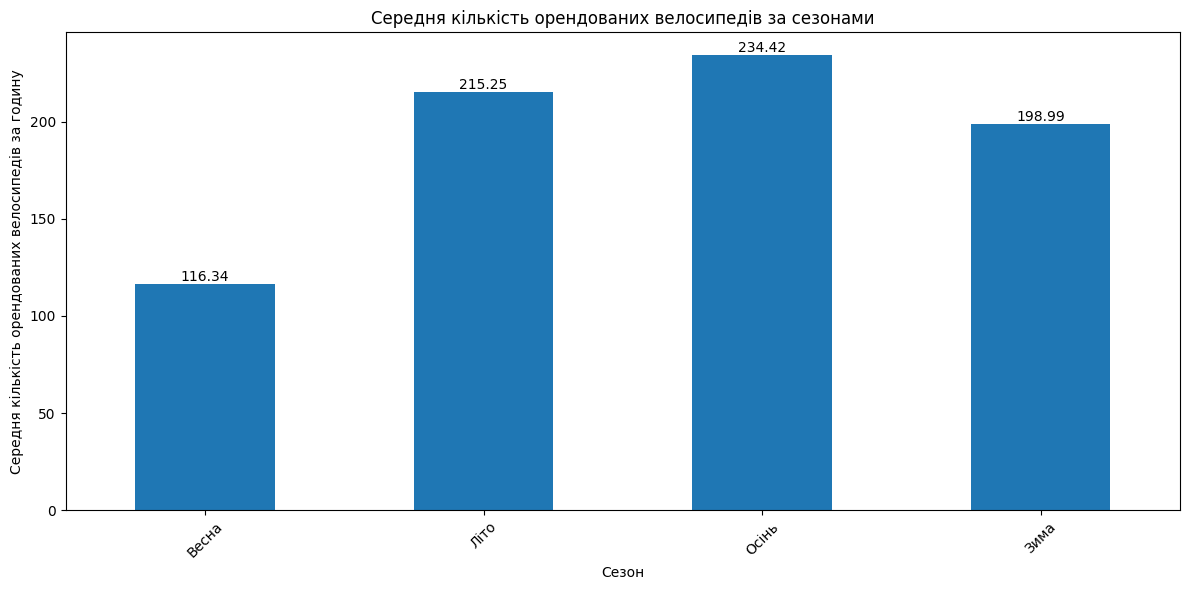

In [ ]:
ax = mean_bike_season.plot.bar(
    figsize=(12, 6),
    title='Cередня кількість орендованих велосипедів за сезонами',
    xlabel='Сезон',
    ylabel='Середня кількість орендованих велосипедів за годину',
    #grid=True
)
ax.set_xticklabels(['Весна', 'Літо', 'Осінь', 'Зима']);
plt.xticks(rotation=45)
plt.tight_layout()

for x, y in enumerate(mean_bike_season):
    ax.text(x, y, str(round(y, 2)), ha='center', va='bottom')
    #більше сподобалось, як виглядає, коли надпис над стовпцем...якщо поставити va="top" буде в стовпці, як стоїть в завдані

In [ ]:
#розрахунок для ввдповіді на останнє питання

diff_bike_season = mean_bike_season.max()/ mean_bike_season.min()
print (f" Різниця між найпопулярнішим сезоном і самим не популярним", round (diff_bike_season, 2), "разів")

 Різниця між найпопулярнішим сезоном і самим не популярним 2.01 разів


##відповідь

назва сезонів розташована згідно опису даних на початку

season - сезон (1=весна, 2=літо, 3=осінь, 4=зима)

бо по цифрам здається більш логічним 1 - зима (також в даних січень - це 1 сезон, а грудень - 4) як на мене не логічно  для більш "правильної" картини сезони треба "переписувати"

працювала з наявними даними

1. Найбільша середня кількість оренди велосипедів за годину, дивлячись на графік - восени (234,42)
2. влітку великий попит, т.я. тепло і це гарна можливість активно провести час

восени найбільша активність, по-перше ще тепло, але вже не так спекотко, тобто комфортніше кататись, закінчились відпустки і поїздки на "шашлики", тож більше часу на оренду. Як варіант, в цьому регіоні восени більше holidays, тож і більши можливостей покататись
3. В 2.01 раза середня кількість оренд восени (234.42) більша ніж весною (116.34)

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [ ]:
mean_bike_month = df_bike.groupby('month')['count'].mean()

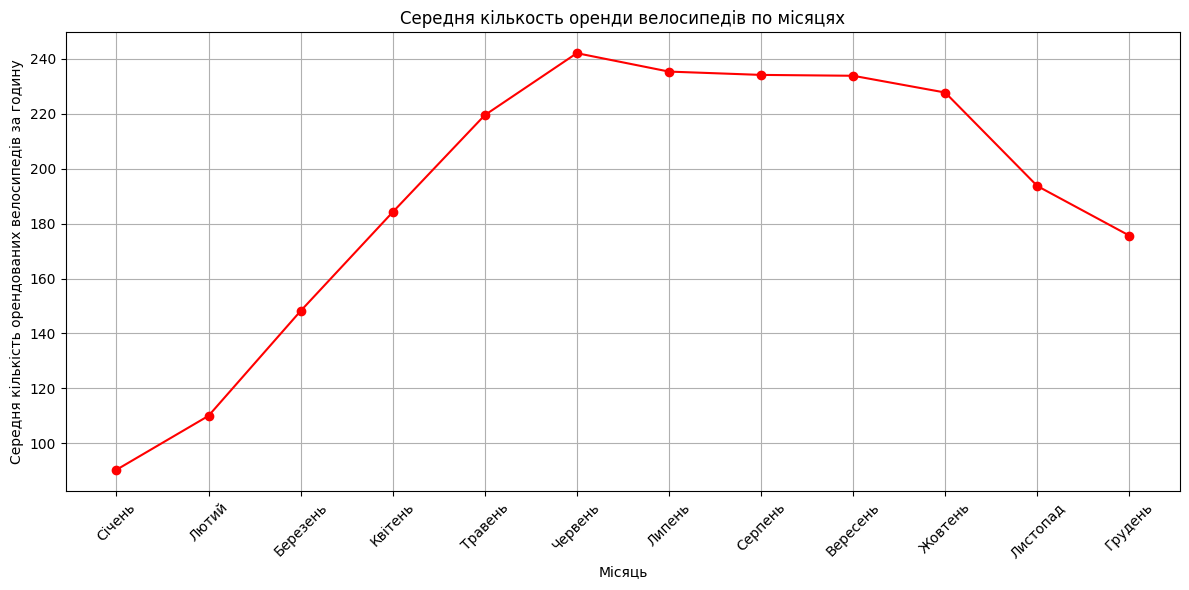

In [ ]:
mean_bike_month.plot.line(
    figsize=(12, 6),
    title='Cередня кількість оренди велосипедів по місяцях',
    xlabel='Місяць',
    ylabel='Середня кількість орендованих велосипедів за годину',
    marker='o',
    color='red',
    grid=True,
)
# цей варіант відображення кожного місяця знайшла в документації до matplotlib
plt.xticks ([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень'],
       rotation=45)
plt.tight_layout();

## відповіді

1. дивлячись на графік пік спостерігається в червні, найбільший спад в січні
2. ні, не збігається...вже наголошувала на це в попередньому завдані, що не зовсім коректно визначені сезони...тут це підтвержується, що сезон 1 - це зима, а сезон 4 - осінь...а не так як визначено в описі даних
3. клімат дуже суттево може вплинути на оренду велосипедів
   - якщо постійні дощі, кататись не зручно
   - постійна спека, це безпечно для здоров'я
   - вітер, не комфортно кататись
   - приємна середня температура, катання приносить задоволення, тож і аренди буде більше

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [ ]:
df_bike.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1


In [ ]:
season_weather = df_bike['weather'].value_counts()

In [ ]:
season_weather

,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
season_weather = df_bike['weather'].value_counts(normalize= True)*100

In [ ]:
# ставлю 3 знаки після коми, т.я. 4 - season має зовсім малий відсоток, щоб його було видно
season_weather.round(3)

,proportion
weather,
1,66.067
2,26.033
3,7.891
4,0.009


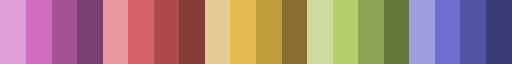

In [ ]:
plt.cm.tab20b_r

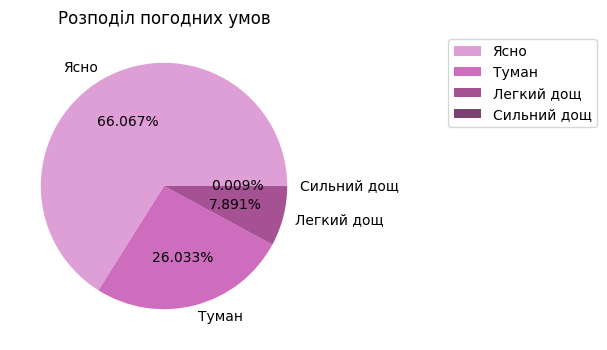

In [ ]:
season_weather.plot.pie(
    figsize=(4, 4),
    autopct='%1.3f%%',
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    title='Розподіл погодних умов',
    ylabel='',
    colors = plt.cm.tab20b_r.colors,
    legend = True,
);

plt.legend(loc='upper left', bbox_to_anchor=(1.4, 1));


##відповіді

1. В датасеті переважає ясна погода - 66, 067%
2. Так був один день з сильним дощем, частка 0,009%
3. При гарній погоді (ясно, тепло), попит великий, т.к. ця погода приємна для катання. При тумані теж попит доволі високий, якщо видимість доволі висока при тумані і температура повітря не низька, то це сприятливі умови. При дощі попит різко знижується, що закономірно.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

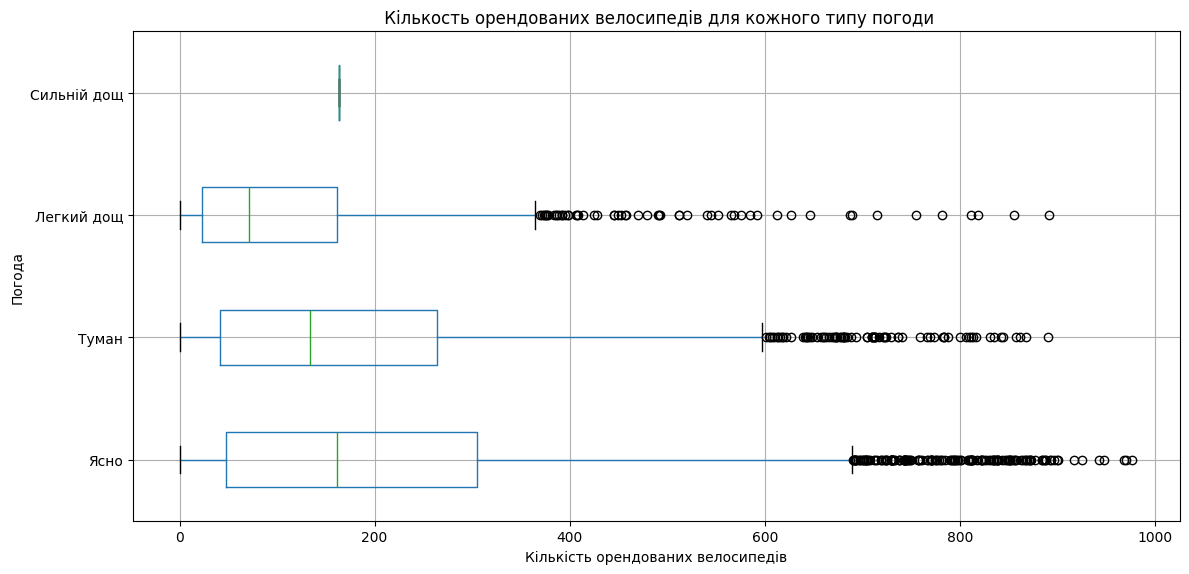

In [ ]:
df_bike.boxplot(
    column='count',
    by='weather',
    vert = False,
    figsize=(12, 6),
);
plt.title(' Кількость орендованих велосипедів для кожного типу погоди')
plt.suptitle('')  # Видаляємо автоматичний заголовок
plt.xlabel('Кількість орендованих велосипедів')
plt.ylabel('Погода')
plt.yticks ([ 1, 2, 3, 4], ['Ясно', 'Туман', 'Легкий дощ', 'Сильній дощ'])
plt.tight_layout();

##відповіді

1. При ясній погоді найбільший розкид у кількості оренди (найбільший ящик)
2. Так, outliers є, при ясній, туманній погоді та легкому дощу. На графіку вони показані чорними кружочками
3. Медіанне значення найвище при ясній погоді (зелена горизонтальна лінія)

Найкраща погода для оренди велосипедів - ясна)))

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

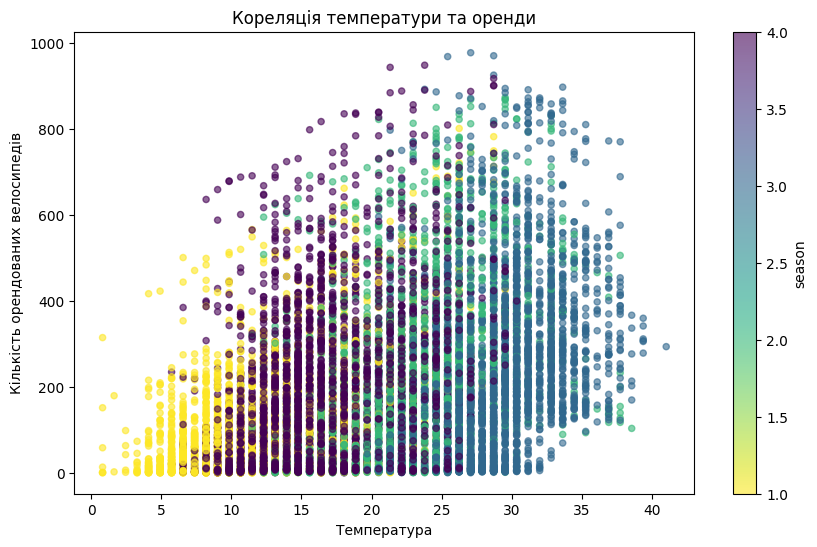

In [ ]:
df_bike.plot.scatter(
    x='temp',
    y='count',
    c='season',
    colormap= 'viridis_r',
    title='Кореляція температури та оренди',
    xlabel='Температура',
    ylabel='Кількість орендованих велосипедів',
    figsize=(10, 6),
    alpha=0.6,
);


При "комфортній" температурі  - (15-32) градуса попит на оренду велосипедів активний, при "аномальних" температурах холодно, чи навпаки спека, попит закономірно падає

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [ ]:
reg_casual_rent = df_bike.groupby(df_bike.index.weekday)[['casual', 'registered']].mean().round(2)

In [ ]:
reg_casual_rent

,casual,registered,count
datetime,,,
0,29.84,160.55,190.39
1,22.98,166.74,189.72
2,22.52,165.89,188.41
3,24.01,173.29,197.30
4,31.00,166.84,197.84
5,63.62,133.04,196.67
6,57.05,123.79,180.84


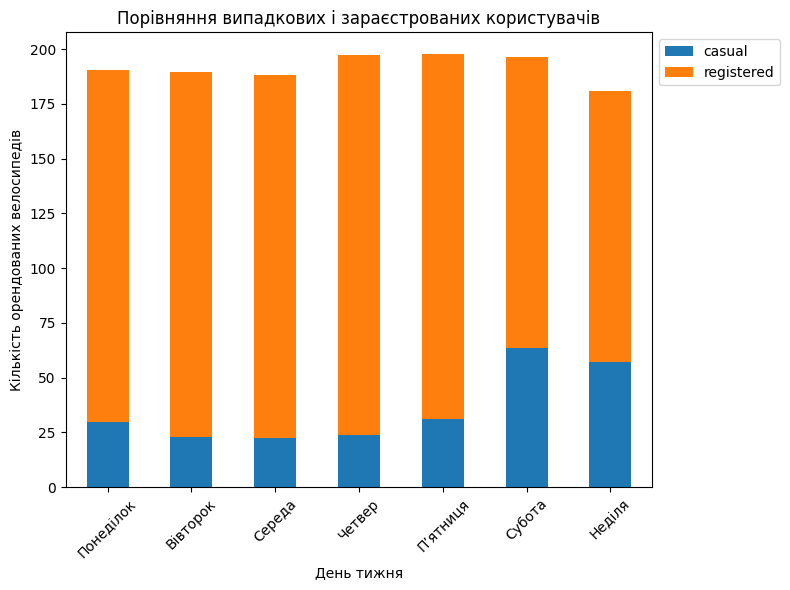

In [ ]:
reg_casual_rent.plot.bar (
    figsize=(8, 6),
    title='Порівняння випадкових і зараєстрованих користувачів',
    ylabel='Кількість орендованих велосипедів',
    xlabel='День тижня',
    stacked = True,
    legend = True,
    #color = ['blue', 'yellow']
);

plt.xticks ([ 0, 1, 2, 3, 4, 5, 6], ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'Пʼятниця', 'Субота', 'Неділя'],
      rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));
plt.tight_layout();


In [ ]:
# додала ще середне по всим користувачас для відповіді на 2 питанння
reg_casual_rent = df_bike.groupby(df_bike.index.weekday)[['casual', 'registered', 'count']].mean().round(2)

In [ ]:
reg_casual_rent

,casual,registered,count
datetime,,,
0,29.84,160.55,190.39
1,22.98,166.74,189.72
2,22.52,165.89,188.41
3,24.01,173.29,197.30
4,31.00,166.84,197.84
5,63.62,133.04,196.67
6,57.05,123.79,180.84


## відповіді

1. Найбільше зарєєстровані користувачі використовують орендовані велосипеди в четверг і п'ятницю. Також видно, що взагалі в будні дні зареестровані користувачі більш активні. Це можна пояснити тим, що вільного часу в людей небагато і вони йдуть туди, де умови вже зрозумілі і є "плюшки"

2. Дивлячись на середне значення всих користувачів по дням тижня, можно сказати, що попит стабільний всими днями з незначним збільшенням в четвер, п'ятницю, суботу. Це говорить про те, що ближче до вихідних більше часу на відпочинок. Також по графікам видно, що в вихідні (субота, неділя) кількісь незареєстрованих користувачів зростає, це може свідчити про те, що люди шукають нових "розваг", чи нових "сервисів" і мають час спробувати.